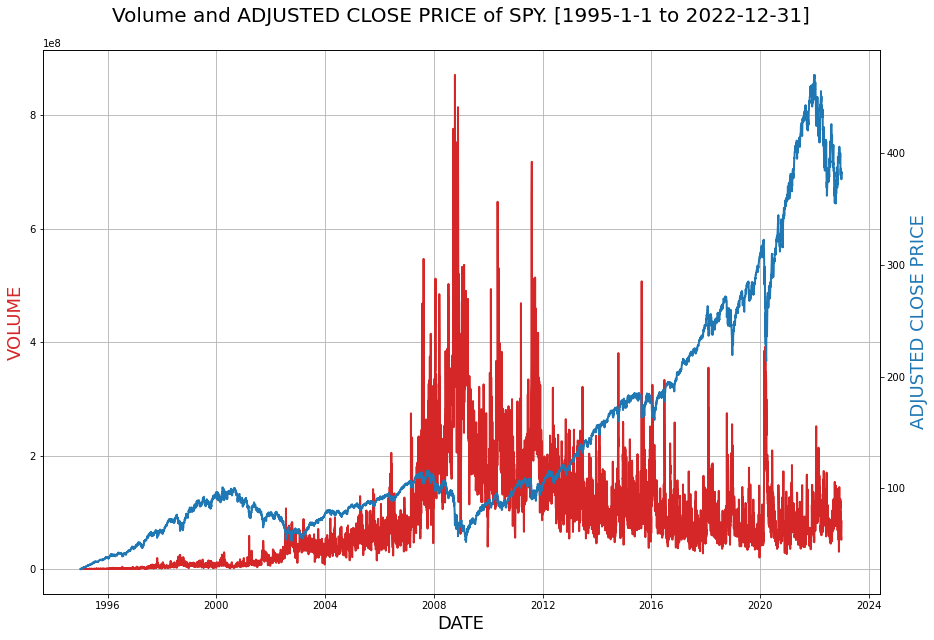

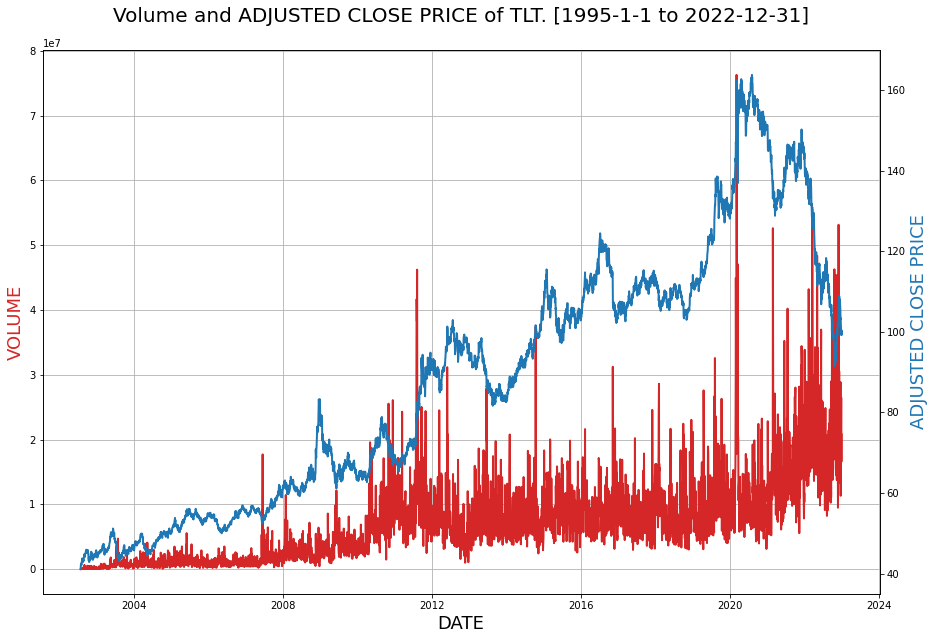

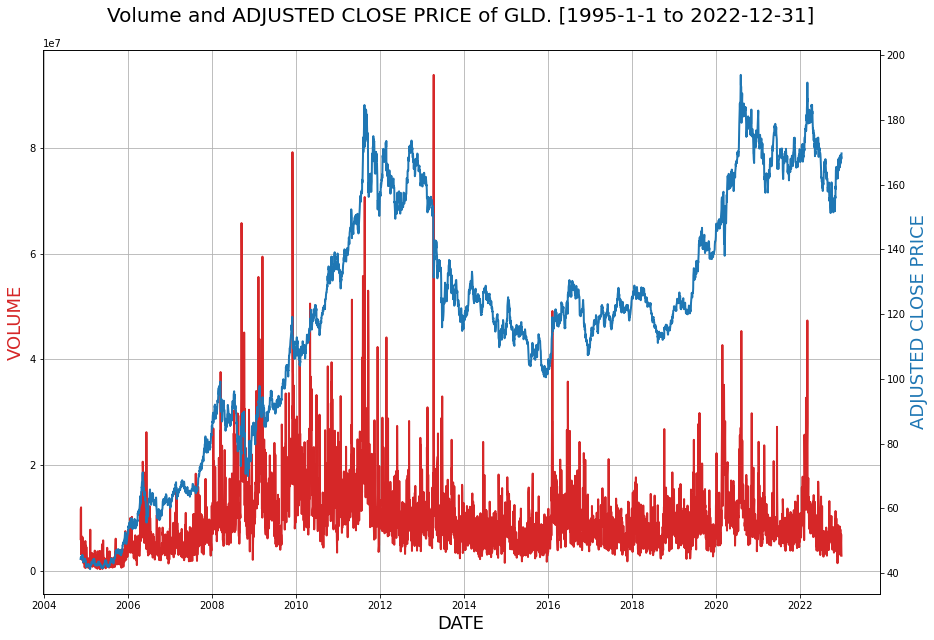

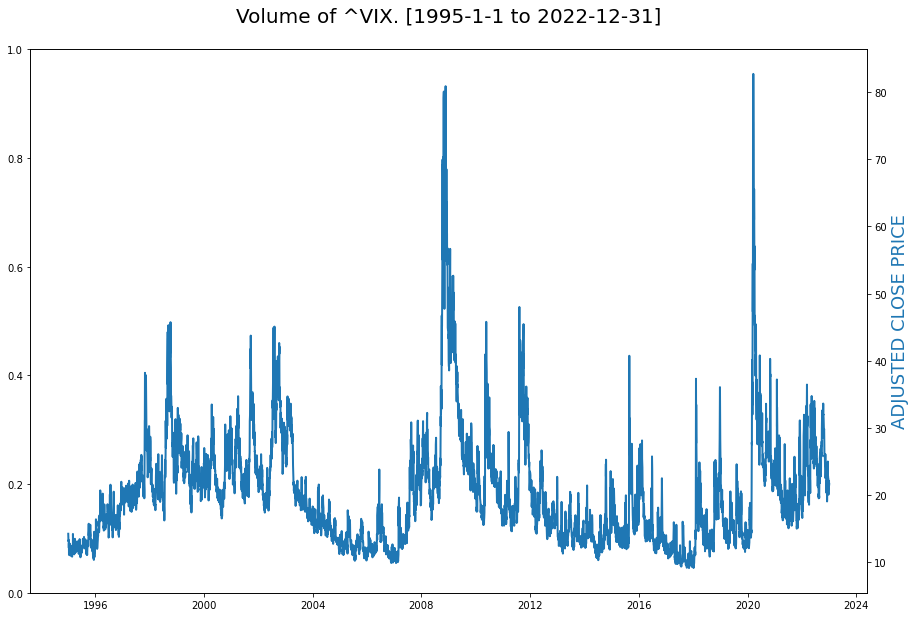

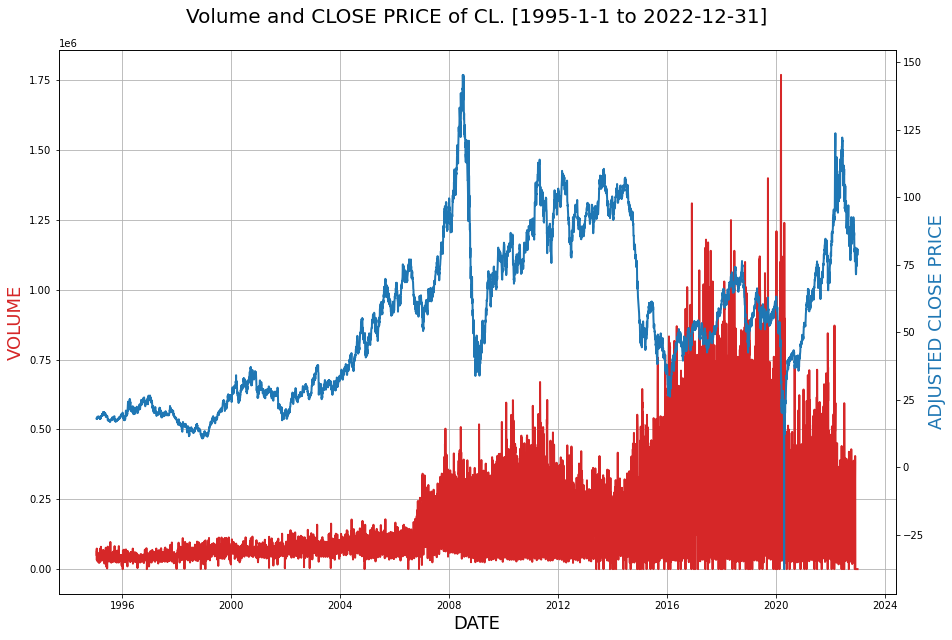

In [89]:
import matplotlib.pyplot as plt
import pandas as pd


def plotData(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)
    df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)

    #to filter rows based on date range
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    

    if(name!="^VIX"):
        color = 'tab:red'
        ax1.set_xlabel('DATE', fontsize=18) 
        ax1.set_ylabel('VOLUME', color=color, fontsize=18)
        ax1.plot(stock_data['Volume'], color=color, linewidth=2) 
        ax1.grid(True)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('ADJUSTED CLOSE PRICE', color=color, fontsize=18)
    if(name=='CL'):
        ax2.plot(stock_data['Close'], color=color, linewidth=2)
    else:
        ax2.plot(stock_data['Adj Close'], color=color, linewidth=2)
    if(name=='^VIX'):
         plt.title('Volume of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    elif(name=='CL'):
        plt.title('Volume and CLOSE PRICE of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    else:
        plt.title('Volume and ADJUSTED CLOSE PRICE of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')

    plt.show()
    
plotData("SPY",'1995-1-1','2022-12-31')
plotData("TLT",'1995-1-1','2022-12-31')
plotData("GLD",'1995-1-1','2022-12-31')
plotData("^VIX",'1995-1-1','2022-12-31')
plotData("CL",'1995-1-1','2022-12-31')
    

In [97]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
from datetime import date
def DRAWDOWN_DURATION(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Volume'])

    
    xs = stock_data['Close']

    i = np.argmax(( np.maximum.accumulate(xs) - xs ) / np.maximum.accumulate(xs)) 
    j = np.argmax(xs[:i]) 
    p=xs[i]
    q=xs[j]
        
    date1=xs[stock_data['Close'] == p].index.tolist()[0]
    date2=xs[stock_data['Close'] == q].index.tolist()[0]

    days=(date1-date2).days

    return date1,date2,days

         

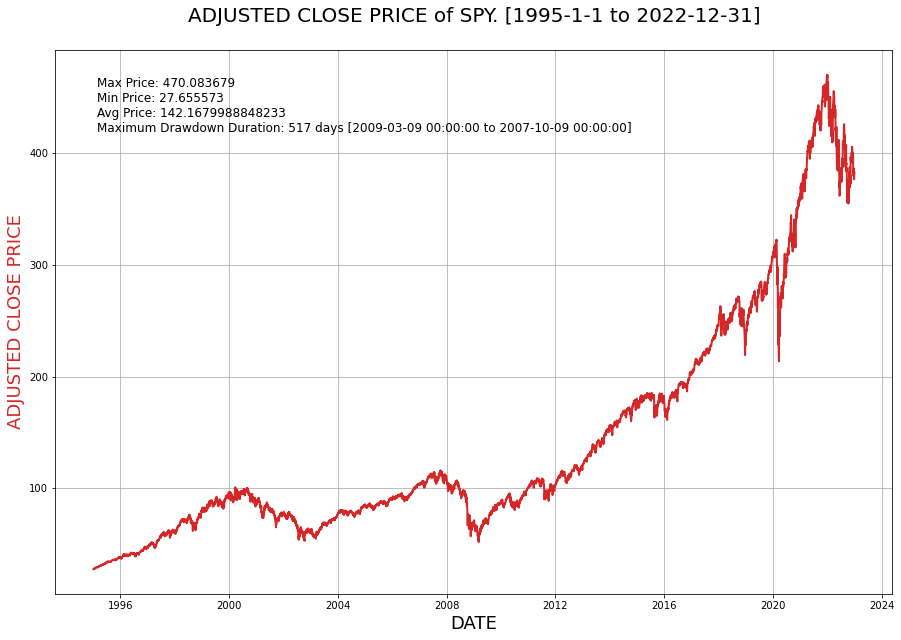

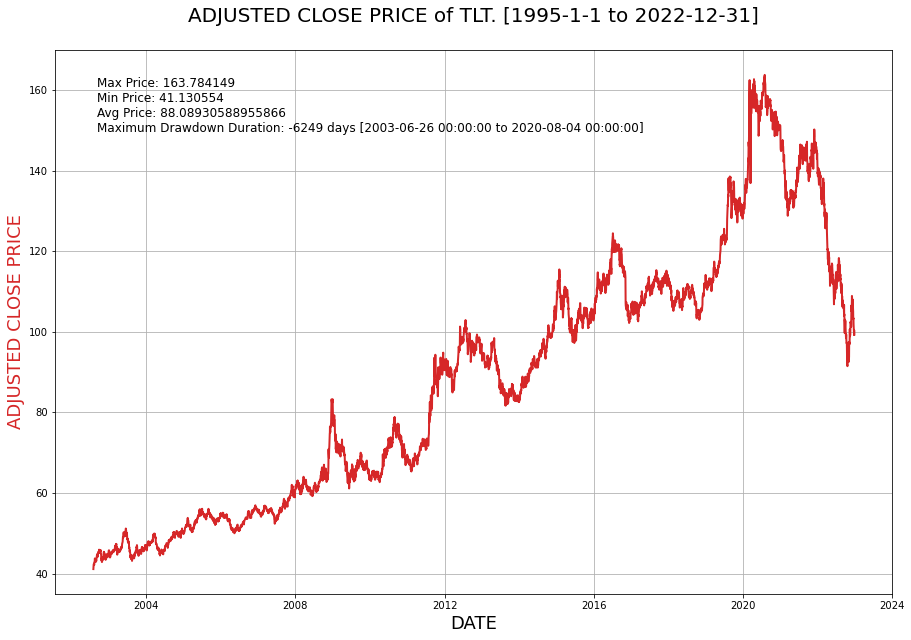

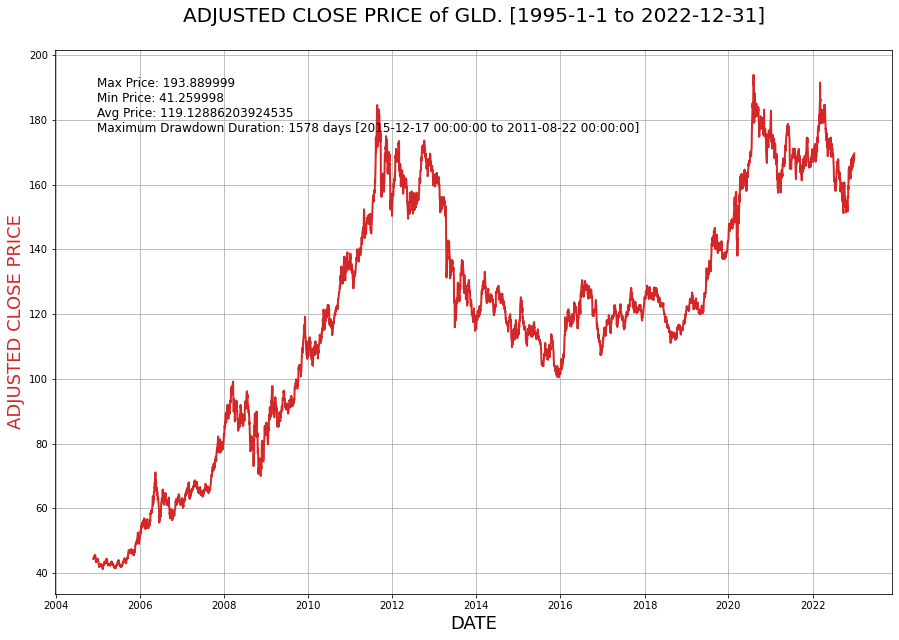

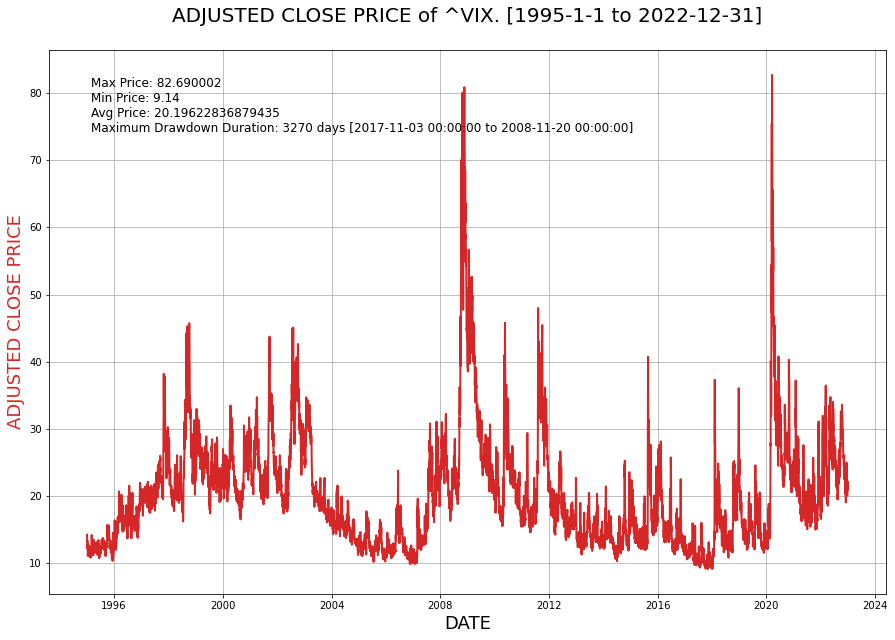

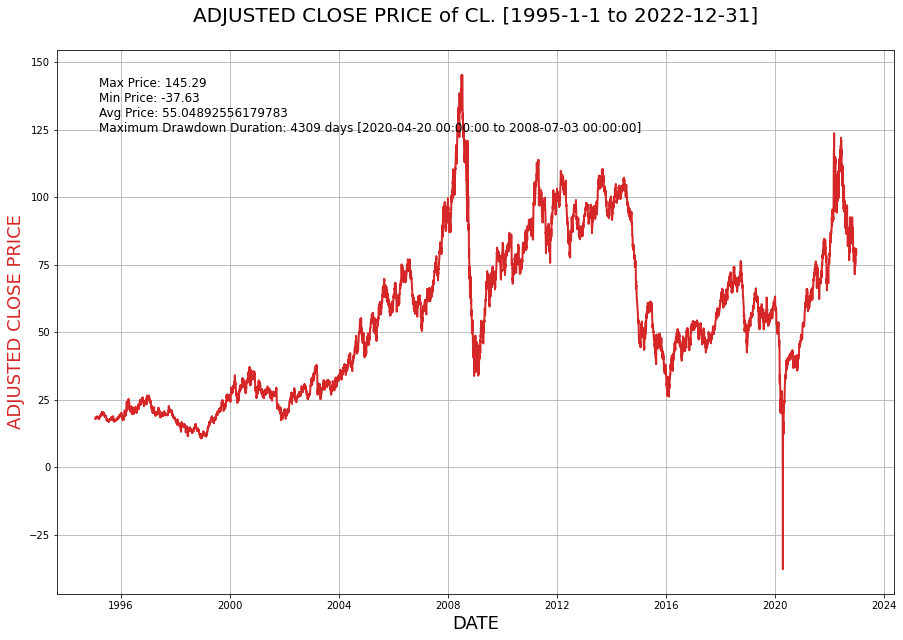

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import accumulate


def plotData(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    date1,date2,days=DRAWDOWN_DURATION(name, starttime,endtime)
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('ADJUSTED CLOSE PRICE', color=color, fontsize=18)
    ax1.plot(stock_data['Adj Close'], color=color, linewidth=2) 
    plt.title('ADJUSTED CLOSE PRICE of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    ax1.grid(True)

    max_price = stock_data['Adj Close'].max()
    min_price = stock_data['Adj Close'].min()
    avg_price = stock_data['Adj Close'].mean()
    text = "Max Price: "+str(max_price)+"\nMin Price: "+str(min_price)+"\nAvg Price: "+str(avg_price)+f"\nMaximum Drawdown Duration: {days} days [{date1} to {date2}]"

    plt.text(0.05, 0.95, text,
             transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')
plotData("SPY",'1995-1-1','2022-12-31')
plotData("TLT",'1995-1-1','2022-12-31')
plotData("GLD",'1995-1-1','2022-12-31')
plotData("^VIX",'1995-1-1','2022-12-31')
plotData("CL",'1995-1-1','2022-12-31')

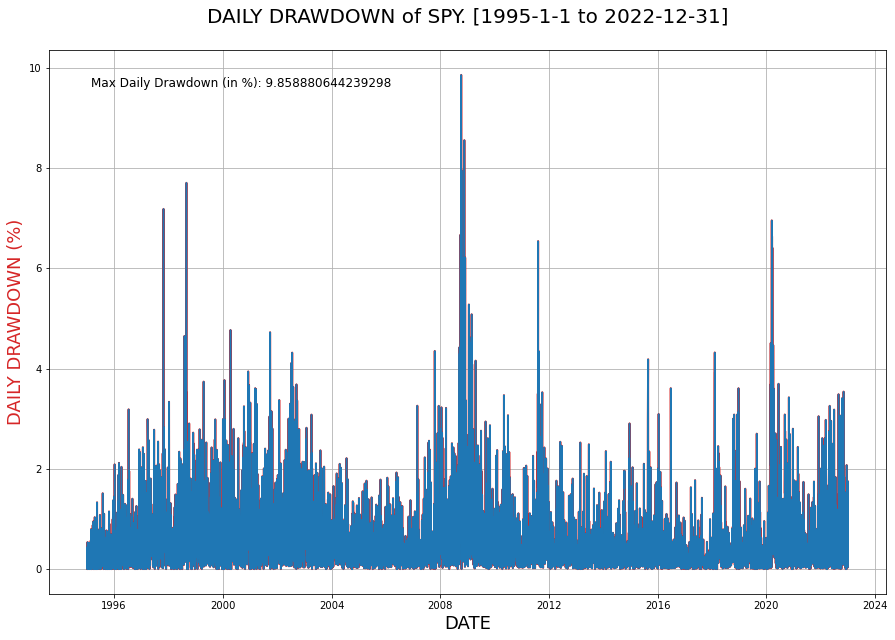

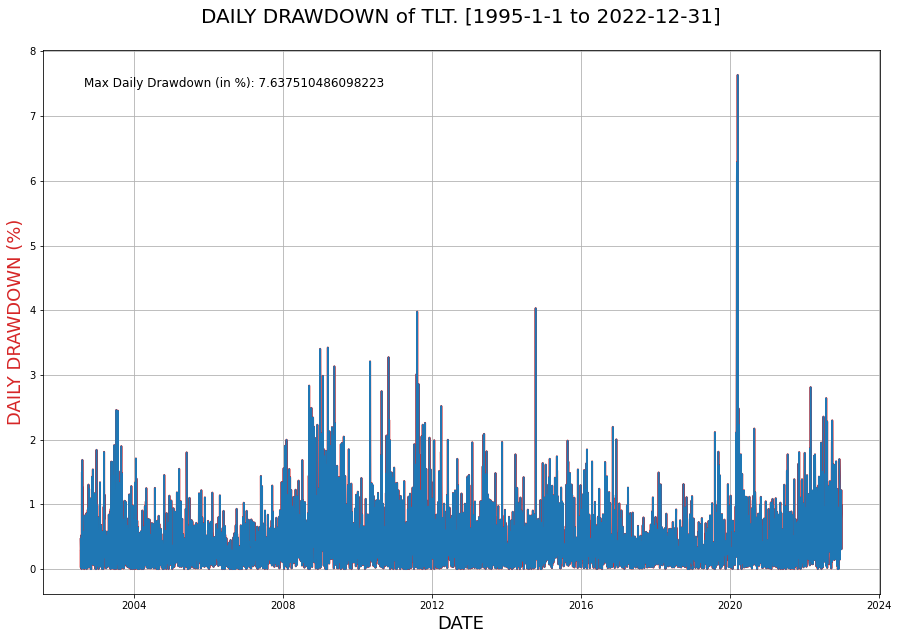

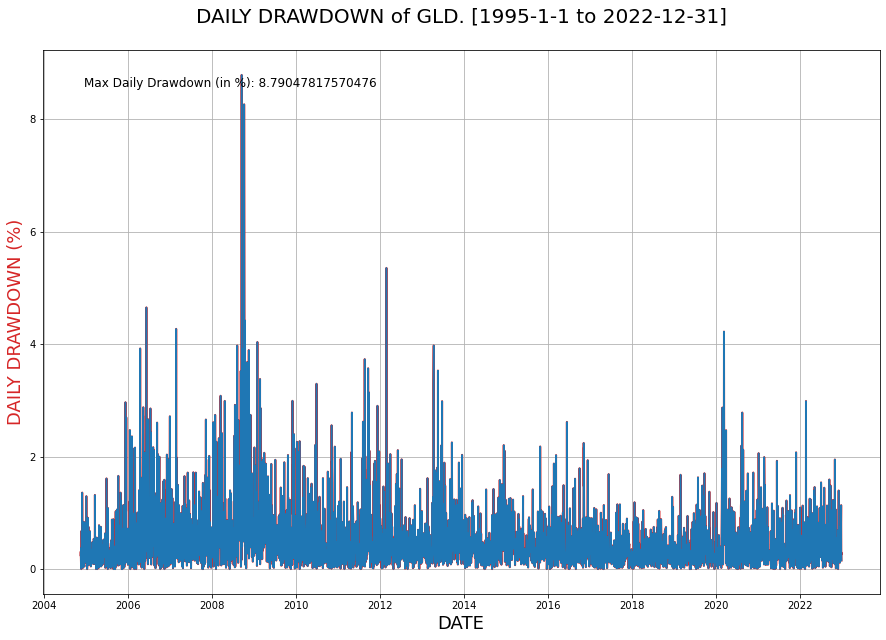

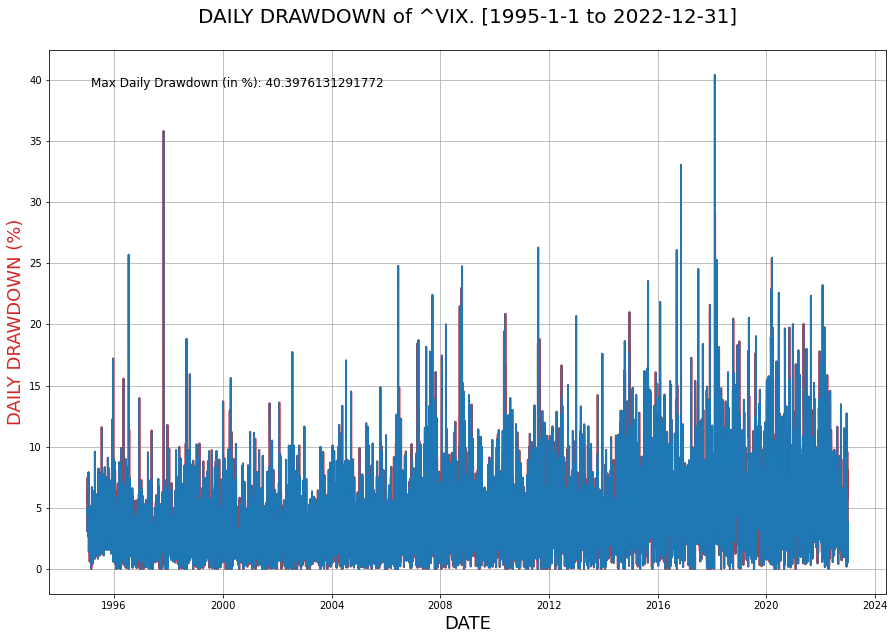

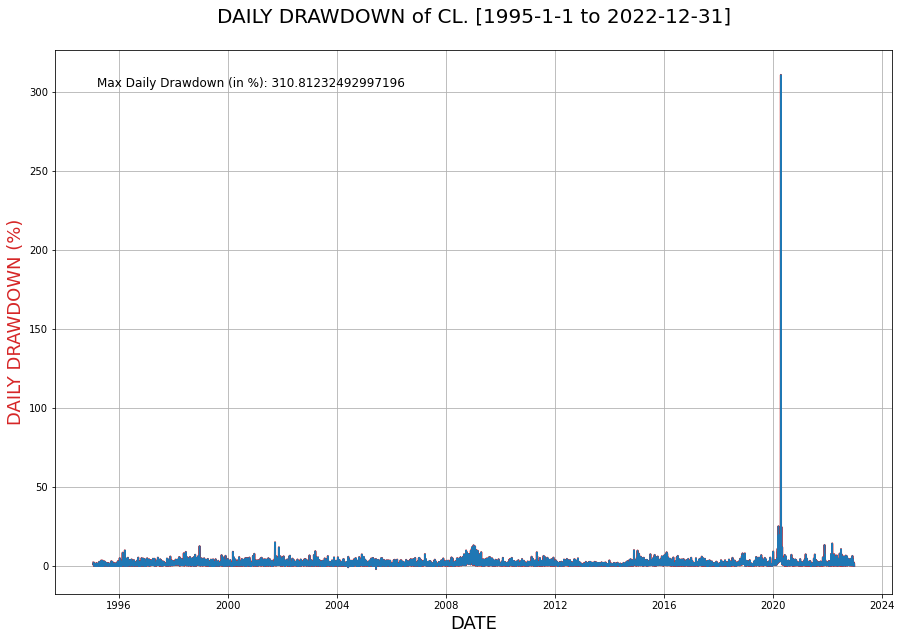

In [99]:
import matplotlib.pyplot as plt
import pandas as pd


def analysis(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

 #daily drawdown 
    df['drawdown'] = (df['High'] - df['Close'])*100 / df['High']
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    

    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    max_drawdown=stock_data['drawdown'].max()    

    
    
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('DAILY DRAWDOWN (%)', color=color, fontsize=18)
    ax1.plot(stock_data['drawdown'], color=color, linewidth=2) 
    text = f"Max Daily Drawdown (in %): {max_drawdown}"
    plt.text(0.05, 0.95, text, transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')
    plt.title('DAILY DRAWDOWN of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    ax1.grid(True)
    plt.plot(stock_data['drawdown'])
    plt.show()
    
analysis("SPY",'1995-1-1','2022-12-31')
analysis("TLT",'1995-1-1','2022-12-31')
analysis("GLD",'1995-1-1','2022-12-31')
analysis("^VIX",'1995-1-1','2022-12-31')
analysis("CL",'1995-1-1','2022-12-31')
    

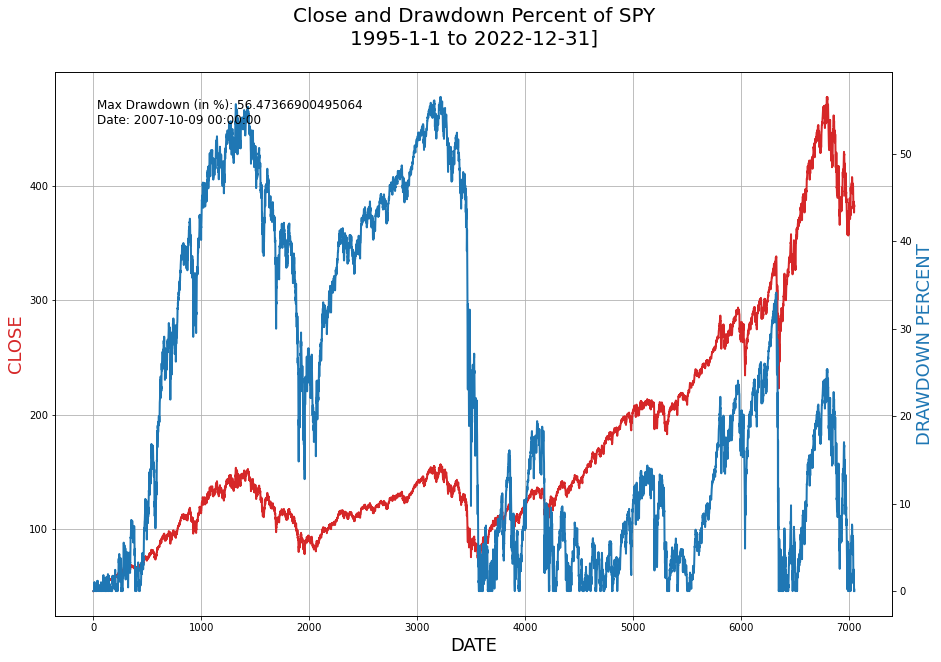

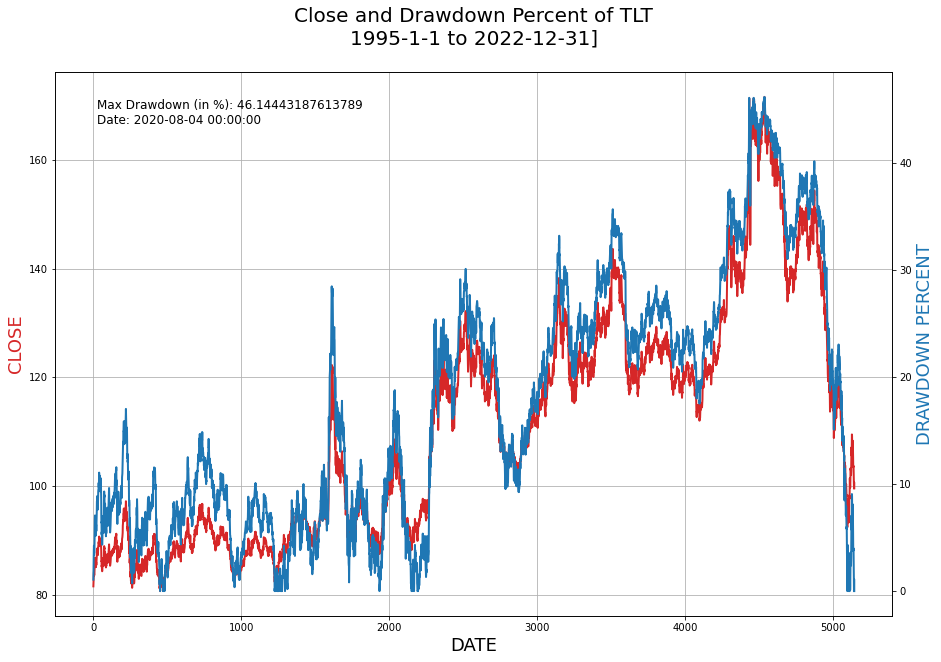

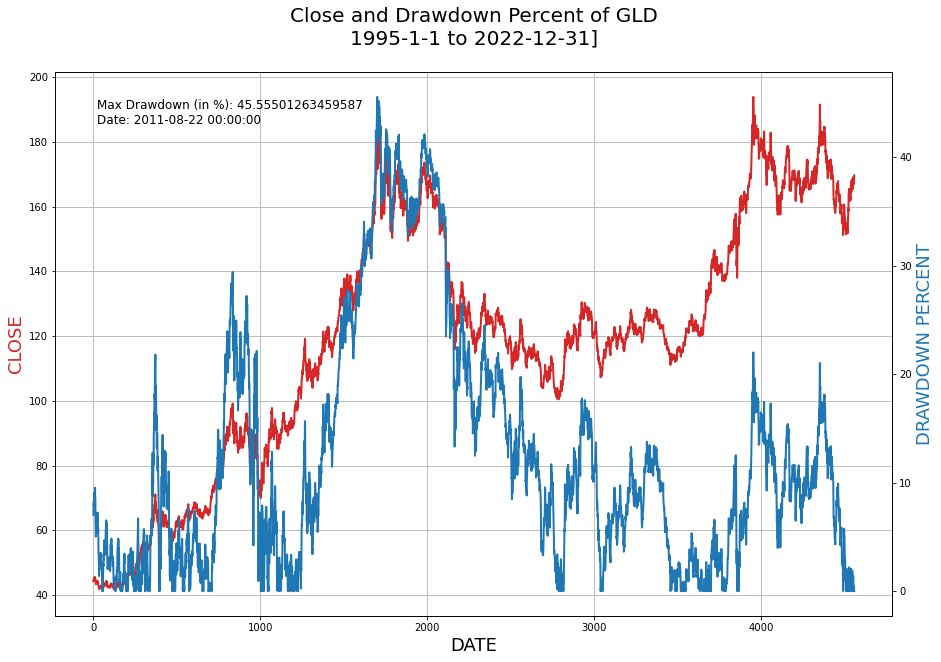

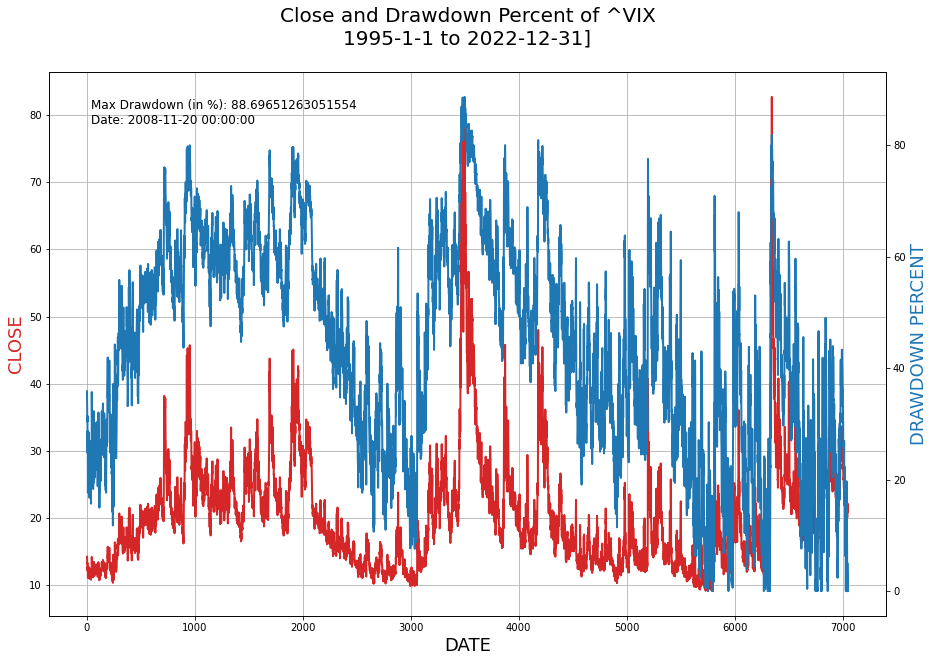

C:\Users\achin\AppData\Local\Temp\ipykernel_13836\844527494.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['DRAWDOWN PERCENT']=0


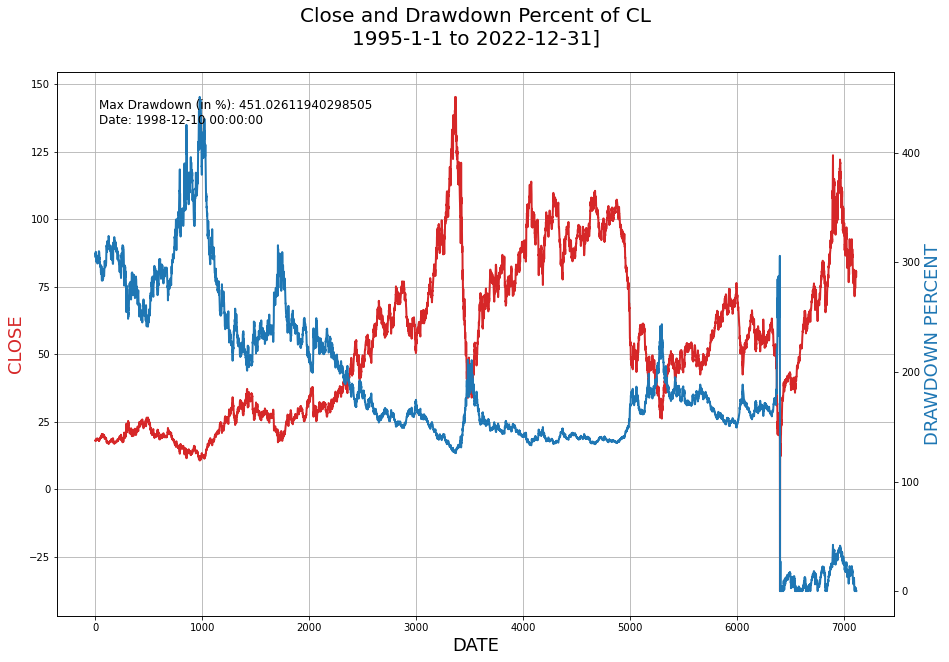

In [100]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# from datetime import date
# def numOfDays(date1, date2):
#     return (date2-date1).days

def DRAWDOWN_PERCENT(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
#     stock_data = df1.set_index('Date')
    stock_data=df1
    stock_data['DRAWDOWN PERCENT']=0
    stock_data = stock_data.reset_index(drop=True)

    minimum= stock_data['Close'].iloc[-1]
    for i in range(len(stock_data)):
        close_value = stock_data.loc[len(stock_data)-i-1, 'Close']
        minimum = min(minimum, close_value)
        stock_data.loc[len(stock_data)-i-1, 'DRAWDOWN PERCENT'] = ((close_value - minimum) * 100 / close_value)

    max_drawdown_percent= stock_data['DRAWDOWN PERCENT'].max()
    date=stock_data.loc[stock_data['DRAWDOWN PERCENT'] == max_drawdown_percent, 'Date'].iloc[0]
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('CLOSE', color=color, fontsize=18)
    ax1.plot(stock_data['Close'], color=color, linewidth=2) 
    ax1.grid(True)
    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('DRAWDOWN PERCENT', color=color, fontsize=18) 
    ax2.plot(stock_data['DRAWDOWN PERCENT'], color=color, linewidth=2)
    text = f"Max Drawdown (in %): {max_drawdown_percent}\nDate: {date}"
    plt.text(0.05, 0.95, text, transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')

    plt.title('Close and Drawdown Percent of '+name+"\n"+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    plt.show()

    
DRAWDOWN_PERCENT("SPY",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("TLT",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("GLD",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("^VIX",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("CL",'1995-1-1','2022-12-31')





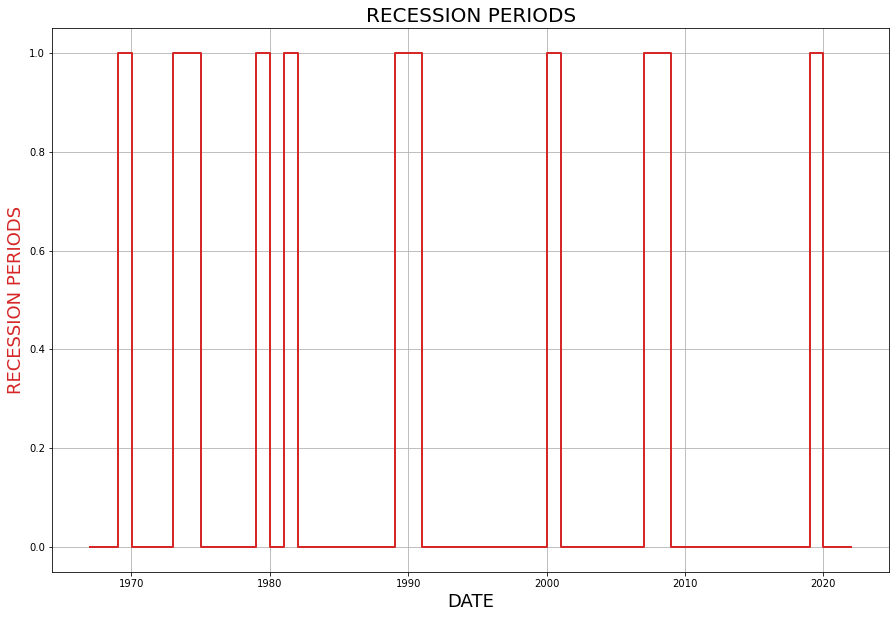

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


def plotrecessionPeriod(name):
    df = pd.read_csv(name+".csv")
    df['Date'] = pd.to_datetime(df['Date'])
#     stock_data = df.set_index('Date')
    
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('RECESSION PERIODS', color=color, fontsize=18)
    ax1.step(df['Date'],df['JHDUSRGDPBR'], color=color, linewidth=2) 
#     plt.text(0.05, 0.95, text, transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')
    plt.title('RECESSION PERIODS', fontsize=20, color='black')
    ax1.grid(True)
    plt.show()
    
plotrecessionPeriod("recession")


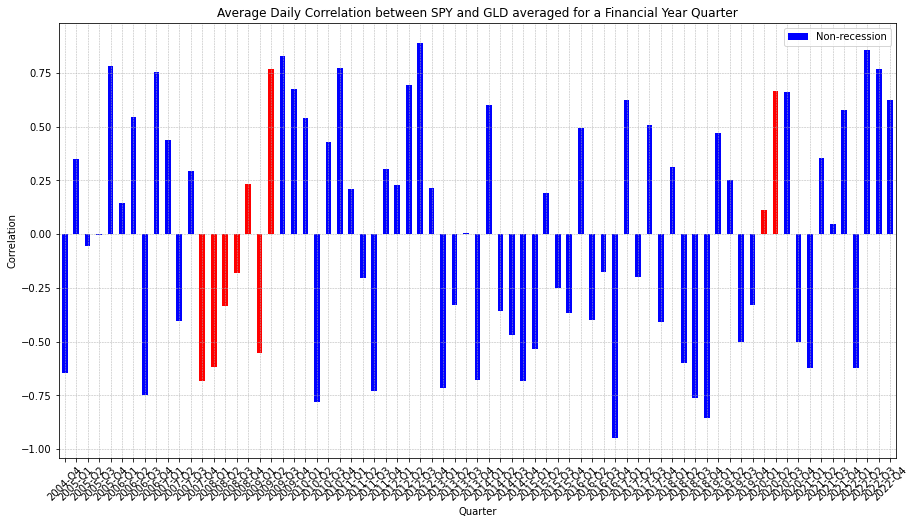

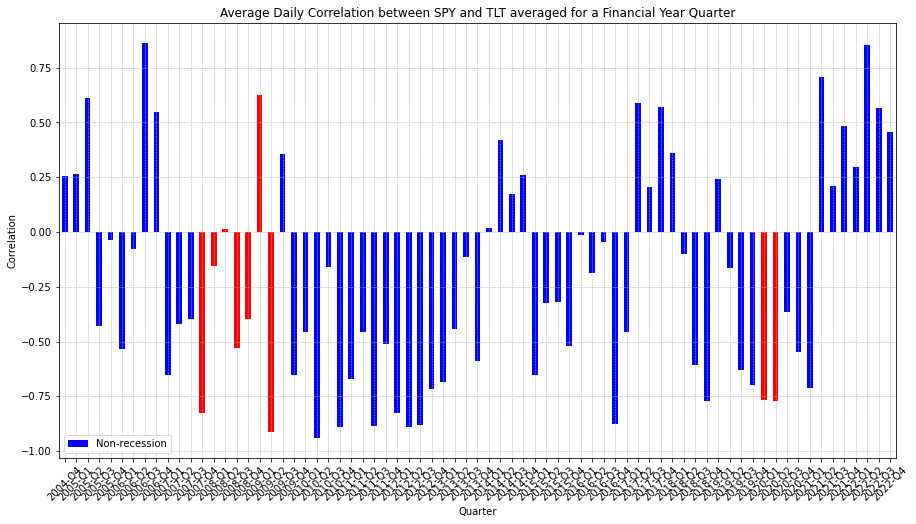

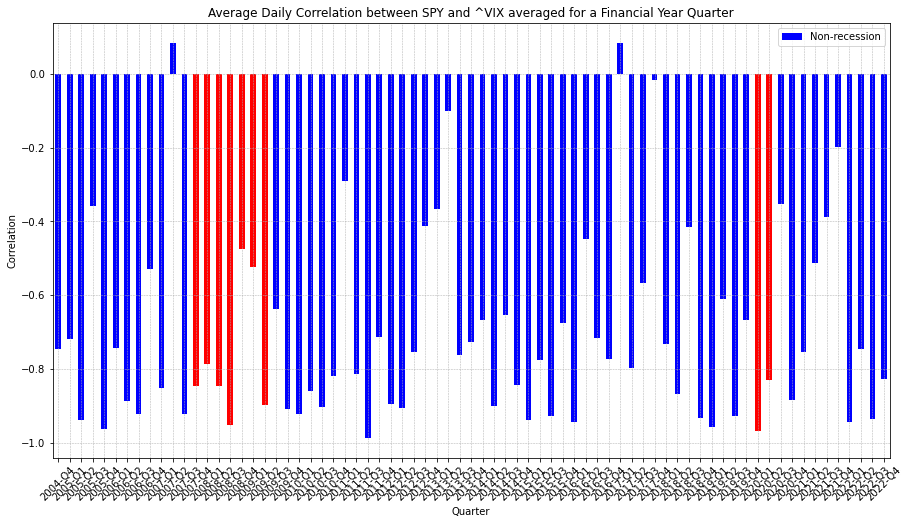

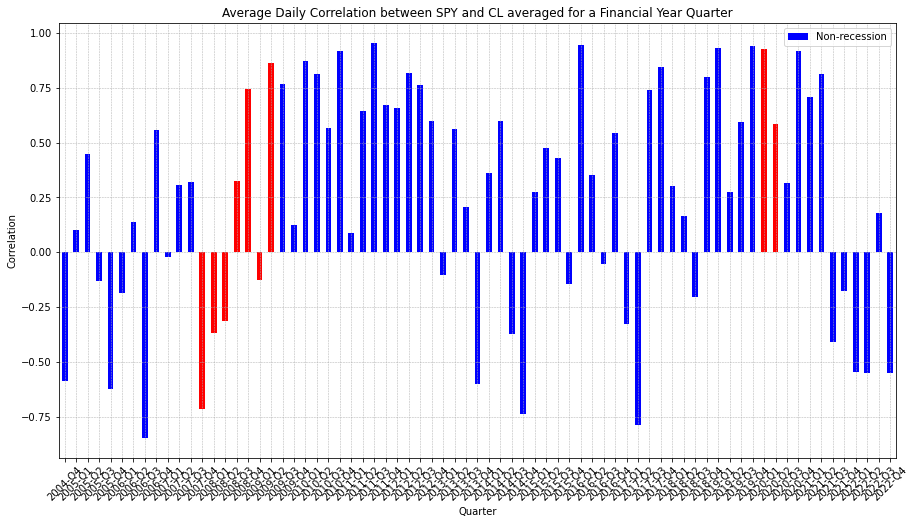

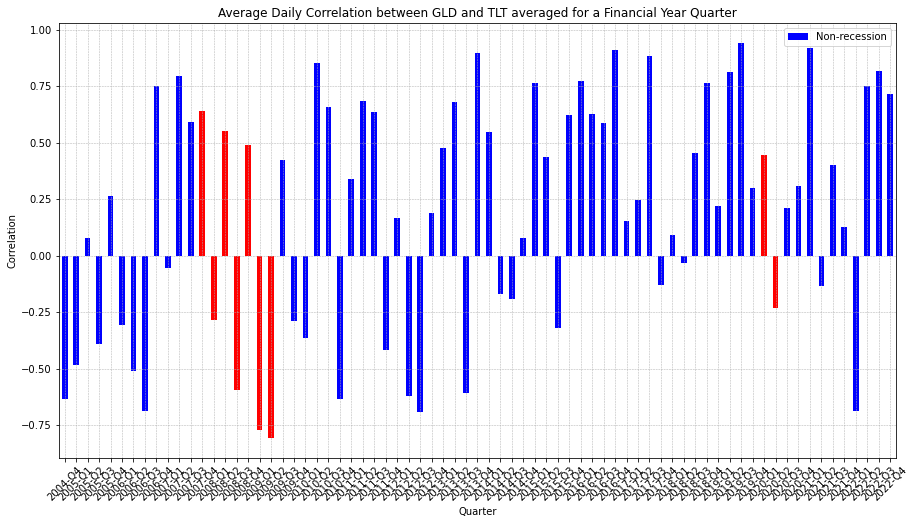

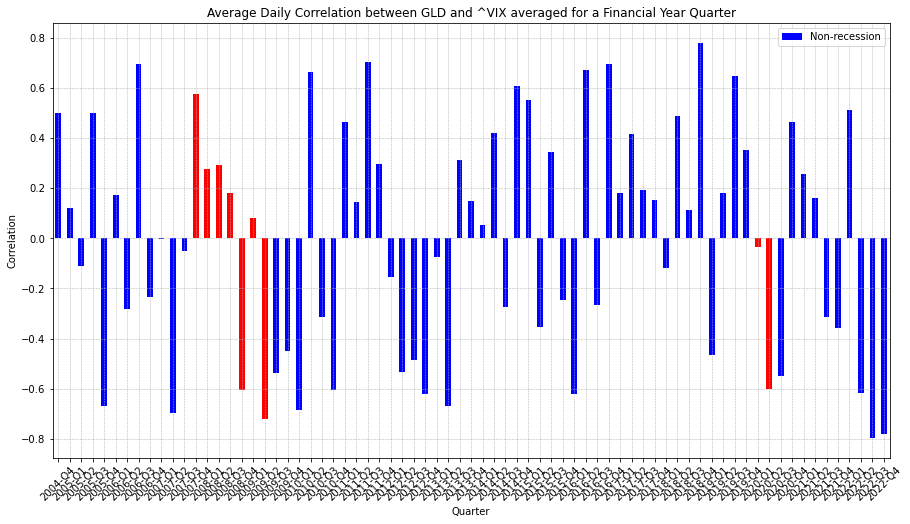

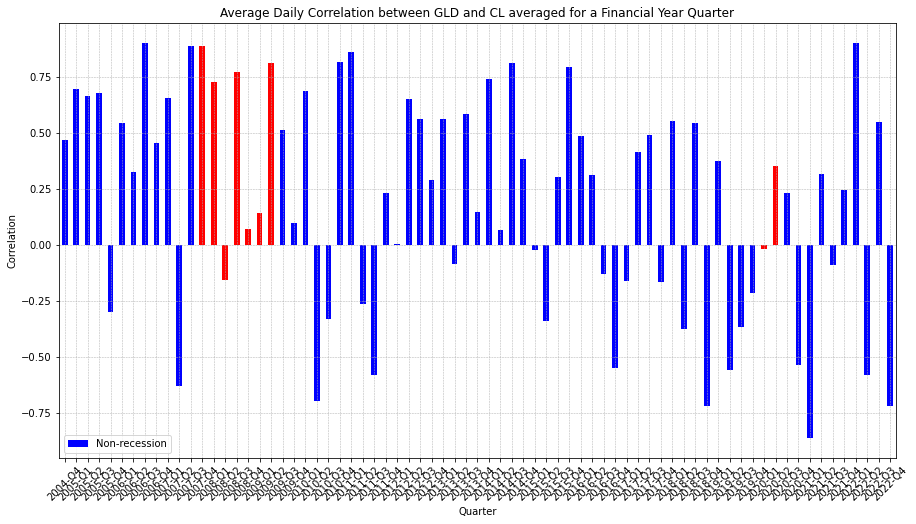

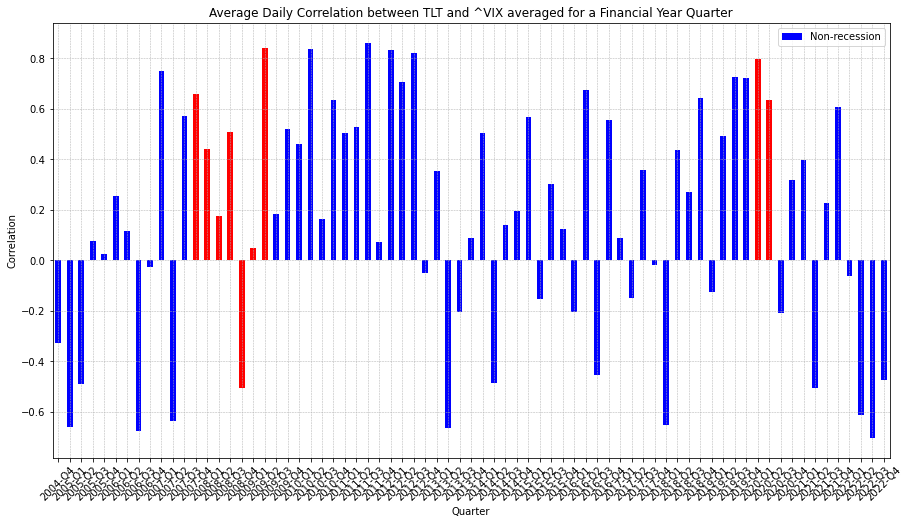

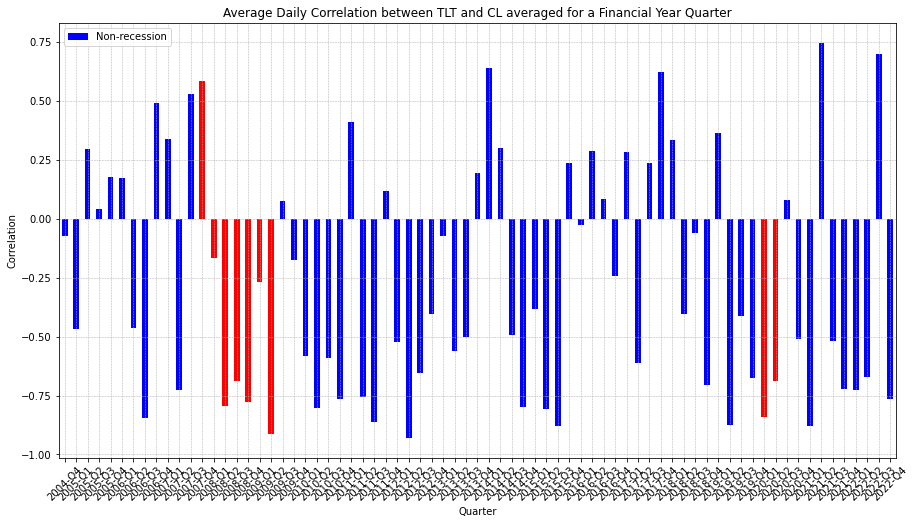

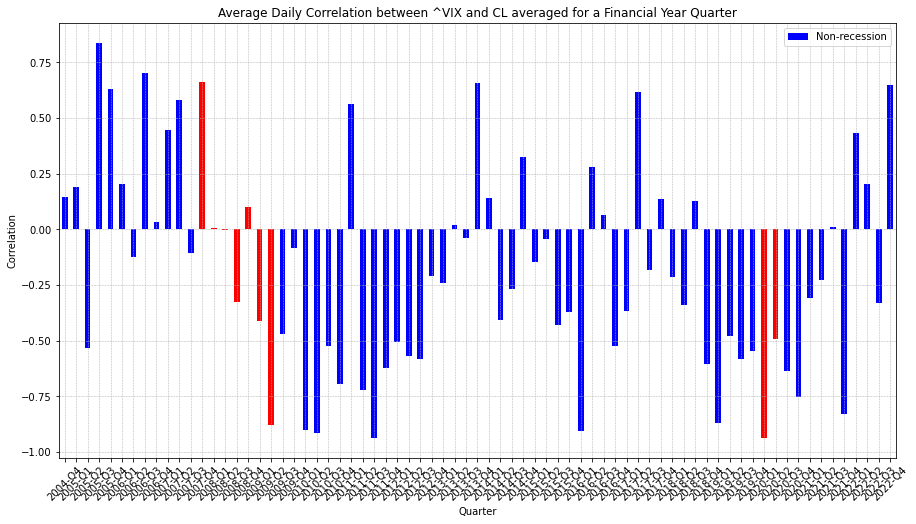

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

import itertools

asset_classes = ['SPY', 'GLD', 'TLT', '^VIX', 'CL']

# Generating all pairs of asset classes
asset_pairs = list(itertools.combinations(asset_classes, 2))

dfs = []
for asset_class in asset_classes:
    filename = f'{asset_class}.csv'
    df = pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], dayfirst=True)
    df = df.rename(columns={'Close': f'{asset_class}'})
    dfs.append(df)

# Merge dfs on Date column
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')

# Define financial year quarters
def get_fin_quarter(date):
    if date.month >= 1 and date.month <= 3:
        return f'{date.year}-Q1'
    elif date.month >= 4 and date.month <= 6:
        return f'{date.year}-Q2'
    elif date.month >= 7 and date.month <= 9:
        return f'{date.year}-Q3'
    else:
        return f'{date.year}-Q4'

# Create new column with financial year quarter
merged_df['FinQuarter'] = merged_df['Date'].apply(get_fin_quarter)
# merged_df.to_csv('merged.csv', index=False)

# Read recession data
recession_df = pd.read_csv('recession.csv', parse_dates=['Financial Quarter Date Start'], dayfirst=True)
recession_df['FinQuarter'] = recession_df['Financial Quarter Date Start'].apply(get_fin_quarter)

corr_df = pd.DataFrame()
for asset_pair in asset_pairs:
    asset1, asset2 = asset_pair
    corr_series = merged_df.groupby('FinQuarter')[[asset_pair[0], asset_pair[1]]].corr().iloc[0::2,-1]
    corr_series.name = f'{asset_pair[0]} vs {asset_pair[1]}'
    
    
    # Join with recession data
    merged_corr_recession = pd.merge(corr_series.to_frame(), recession_df, on='FinQuarter', how='left')
    merged_corr_recession['JHDUSRGDPBR'] = merged_corr_recession['JHDUSRGDPBR'].fillna(0)
    
    
    
    # Plot the bar graph
    merged_corr_recession['color_label'] = merged_corr_recession['JHDUSRGDPBR'].apply(lambda x: 'Recession' if x==1 else 'Non-recession')
    ax = merged_corr_recession.plot(x='FinQuarter', y=corr_series.name, kind='bar', color=merged_corr_recession['JHDUSRGDPBR'].apply(lambda x: 'red' if x==1 else 'blue'))

#     ax = merged_corr_recession.plot(x='FinQuarter', y=corr_series.name, kind='bar', color=merged_corr_recession['JHDUSRGDPBR'].apply(lambda x: 'red' if x==1 else 'blue'))
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Correlation')
    ax.set_title(f'Average Daily Correlation between {asset1} and {asset2} averaged for a Financial Year Quarter')
    plt.xticks(rotation=45)
    legend_labels = ['Non-recession','Recession']
    ax.legend(handles=ax.containers, labels=legend_labels)
    ax.grid(linewidth=0.5, linestyle='--')

    plt.gcf().set_size_inches(15, 8)
    plt.show()